### <u>Objective</u> - The objective of this project is to create an email spam detection system that uses machine learning algorithms to classify incoming emails. 

### By training the model on a labeled dataset of spam and non-spam emails, we aim to develop an accurate and efficient spam detector that can reliably identify and categorize emails based on their content and characteristics.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:/Virtual Environment/ANUJ/spam.csv', encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1. <u>Data Cleaning</u>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [7]:
df.columns = df.columns.str.strip() 

In [8]:
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Renaming Columns Names 

In [10]:
df.rename(columns={'v1':'Ham/Spam','v2':'Messages'}, inplace=True)

### Label Encoding 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [13]:
df['Ham/Spam']=encoder.fit_transform(df['Ham/Spam'])

In [14]:
df

,Ham/Spam,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Missing Values

In [15]:
df.isnull().sum()

Ham/Spam    0
Messages    0
dtype: int64

### Duplicate Values 

In [16]:
df.duplicated().sum()

403

### Remove Duplicated Values 

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

# 2. <u>Exploratory Data Analysis</u>

In [19]:
import matplotlib.pyplot as plt

In [20]:
ValueCounts = df['Ham/Spam'].value_counts()

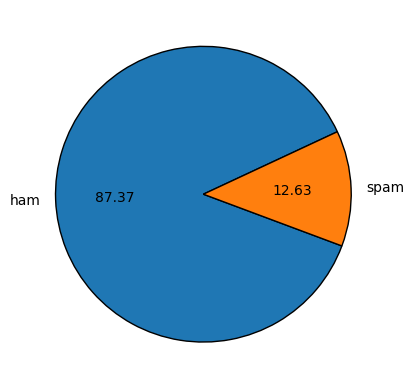

In [21]:
plt.pie(ValueCounts, labels=['ham','spam'], wedgeprops={'edgecolor':'black'}, startangle=25, autopct='%0.2f')
plt.show()

##### Data is Imbalance

In [22]:
import nltk


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Anuj
[nltk_data]     Pathekar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['Characters']=df['Messages'].apply(len)

C:\Users\Anuj Pathekar\AppData\Local\Temp\ipykernel_18224\2826194473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Characters']=df['Messages'].apply(len)


In [25]:
df

,Ham/Spam,Messages,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


##### Number of Words

In [26]:
df['NumberofWords']=df['Messages'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Anuj Pathekar\AppData\Local\Temp\ipykernel_18224\2017608847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberofWords']=df['Messages'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
df['NumberofSentences']= df['Messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Anuj Pathekar\AppData\Local\Temp\ipykernel_18224\1501528827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberofSentences']= df['Messages'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [28]:
df

,Ham/Spam,Messages,Characters,NumberofWords,NumberofSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [29]:
df.describe()

,Ham/Spam,Characters,NumberofWords,NumberofSentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


# 2. <u>Data Pre-Processing</u>

- Lower Case
- Tokenization
- Removing Speical Characters
- Removing Stop Words and Punctuation
- Stemming

In [30]:
from nltk.corpus import stopwords 

import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Anuj
[nltk_data]     Pathekar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
#Stemming

from nltk.stem.porter import PorterStemmer

ps= PorterStemmer()

In [32]:
def preprocess_word(word):
#-----------Lower Case---------------#
    word=word.lower()
#-----------Tokenization-------------#
    word=nltk.word_tokenize(word)

#----------Removing Special Characters (@#$!)---------------#
    templist=[]
    for i in word:
        if i.isalnum():
            templist.append(i)

#-----------Removing Stop Words and Punctuation---------------#
         # Stop Words - {i,me,myself,our,we,our,you,yours}
         # Punctuations - {.,""\[]()}

    word = templist[:]
    templist.clear()
  
    for i in word:
        if i not in  stopwords.words('english') and i not in string.punctuation:
            templist.append(i)

    word = templist[:]
    templist.clear()

    for i in word:
        templist.append(ps.stem(i))


            
    return " ".join(templist)

In [33]:
preprocess_word(df['Messages'][1])

'ok lar joke wif u oni'

In [34]:
df['Messages'].apply(preprocess_word)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Messages, Length: 5169, dtype: object

In [35]:
df['FinalWords']=df['Messages'].apply(preprocess_word)

C:\Users\Anuj Pathekar\AppData\Local\Temp\ipykernel_18224\1985061635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FinalWords']=df['Messages'].apply(preprocess_word)


In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [37]:
from wordcloud import WordCloud

wc=WordCloud(width=800,height=800, min_font_size=10, background_color='lavender')

In [38]:
wordcloud_spam = wc.generate(df[df['Ham/Spam']==1]['FinalWords'].str.cat(sep=" "))

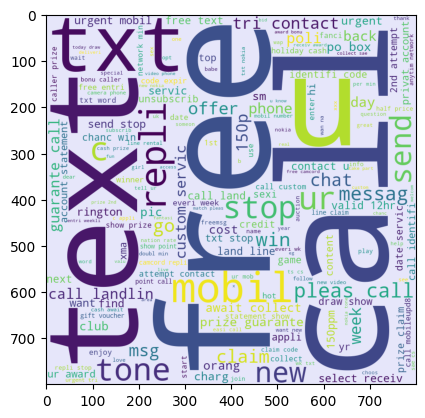

In [39]:
plt.imshow(wordcloud_spam)


In [40]:
wordcloud_ham = wc.generate(df[df['Ham/Spam']==0]['FinalWords'].str.cat(sep=" "))

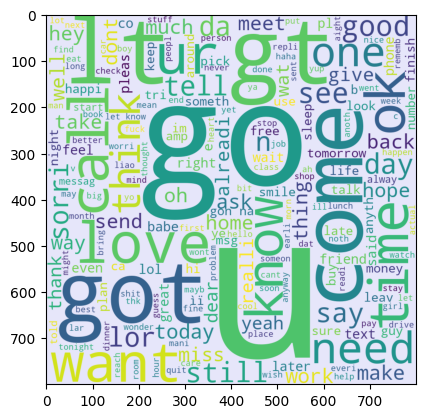

In [41]:
plt.imshow(wordcloud_ham)

In [42]:
df

,Ham/Spam,Messages,Characters,NumberofWords,NumberofSentences,FinalWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# 4. <u>Model Building</u>

First we use Naive Bayes Model As We All Know That Naive Bayes Perform Well, When Input Is Textual Data.

- All Machine Learning Algorithms Needs Numerical Input, But Look At Our Data There Are 2 Columns Input(FinalWords) And Output(Ham/Spam), So We Have Output In Numerical Form But Input Is In Textual Form So To Convert Text Into Number(Vector) So We Can Say That Vectorization We Can Use Few Techniques Such As BagOfWords, TFDIF, WordToWord

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [44]:
X=cv.fit_transform(df['FinalWords']).toarray()

In [45]:
X.shape

(5169, 6708)

In [46]:
Y=df['Ham/Spam'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# We Are Importing 3 Naive Bayes As We Dont Know Data Distribution

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train, Y_train)
Y_Predict= gnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_Predict))
print(confusion_matrix(Y_test, Y_Predict))
print("Precision Score: ",precision_score(Y_test, Y_Predict))

Accuracy Score:  0.8800773694390716
[[792 104]
 [ 20 118]]
Precision Score:  0.5315315315315315


In [52]:
mnb.fit(X_train, Y_train)
Y_Predict_MNB= mnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_Predict_MNB))
print(confusion_matrix(Y_test, Y_Predict_MNB))
print("Precision Score: ",precision_score(Y_test, Y_Predict_MNB))

Accuracy Score:  0.9642166344294004
[[871  25]
 [ 12 126]]
Precision Score:  0.8344370860927153


In [53]:
bnb.fit(X_train, Y_train)
Y_Predict_BNB= bnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_Predict_BNB))
print(confusion_matrix(Y_test, Y_Predict_BNB))
print("Precision Score: ",precision_score(Y_test, Y_Predict_BNB))

Accuracy Score:  0.9700193423597679
[[893   3]
 [ 28 110]]
Precision Score:  0.9734513274336283


### Using TF-DIF Instead of CountVectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [55]:
X= tfidf.fit_transform(df['FinalWords']).toarray()

In [56]:
X.shape

(5169, 6708)

In [57]:
Y=df['Ham/Spam'].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# We Are Importing 3 Naive Bayes As We Dont Know Data Distribution

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train, Y_train)
Y_Predict= gnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_Predict))
print(confusion_matrix(Y_test, Y_Predict))
print("Precision Score: ",precision_score(Y_test, Y_Predict))

Accuracy Score:  0.8762088974854932
[[793 103]
 [ 25 113]]
Precision Score:  0.5231481481481481


In [63]:
mnb.fit(X_train, Y_train)
Y_Predict_MNB= mnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_Predict_MNB))
print(confusion_matrix(Y_test, Y_Predict_MNB))
print("Precision Score: ",precision_score(Y_test, Y_Predict_MNB))

Accuracy Score:  0.9593810444874274
[[896   0]
 [ 42  96]]
Precision Score:  1.0


In [64]:
bnb.fit(X_train, Y_train)
Y_Predict_BNB= bnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_Predict_BNB))
print(confusion_matrix(Y_test, Y_Predict_BNB))
print("Precision Score: ",precision_score(Y_test, Y_Predict_BNB))

Accuracy Score:  0.9700193423597679
[[893   3]
 [ 28 110]]
Precision Score:  0.9734513274336283


# Deployment 

In [66]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))